# Importing dataset variables for Black and Scholes Model


In [1]:
import pandas as pd


# Use read_csv() to load the CSV file into a pandas DataFrame
data = pd.read_csv('Data/full_data.csv',low_memory=False)

bs_variables = [
    'strike',
    'stock',
    'tau',
    'sigma',
    'price',
    'call',
    'ticker'
]


bs_data = data[bs_variables]

In [2]:
call_data = bs_data[bs_data['call'] == 1]
put_data = bs_data[bs_data['call'] == 0]

call_data = call_data.drop(columns=['call'])
put_data = put_data.drop(columns=['call'])

In [3]:
call_data

,strike,stock,tau,sigma,price,ticker
0,210.0,407.48,0.055556,0.223118,199.70,MSFT
1,220.0,417.32,0.003968,0.223118,200.32,MSFT
2,230.0,417.32,0.003968,0.223118,189.90,MSFT
3,235.0,404.90,0.126984,0.223118,174.91,MSFT
4,250.0,417.32,0.003968,0.223118,170.23,MSFT
...,...,...,...,...,...,...
73147,0.5,0.38,0.079365,1.978739,0.05,BCDA
73148,1.0,7.10,0.369048,1.064334,0.10,UXIN
73149,2.0,7.10,0.365079,1.064334,0.05,UXIN
73150,3.0,12.50,0.519841,1.064334,0.15,UXIN


In [4]:
put_data

,strike,stock,tau,sigma,price,ticker
65,210.0,406.22,0.031746,0.223118,0.01,MSFT
66,220.0,404.52,0.019841,0.223118,0.02,MSFT
67,235.0,405.57,0.095238,0.223118,0.02,MSFT
68,250.0,404.06,0.091270,0.223118,0.02,MSFT
69,255.0,414.92,0.047619,0.223118,0.02,MSFT
...,...,...,...,...,...,...
73144,4.0,3.48,0.642857,2.166917,2.15,IDEX
73145,4.5,1.06,0.083333,2.166917,3.40,IDEX
73146,5.5,2.36,0.436508,2.166917,3.43,IDEX
73152,1.0,11.65,0.464286,1.064334,0.25,UXIN


# Compute the BS  model for all the options

In [5]:
import numpy as np
from scipy.stats import norm
from datetime import datetime

def black_scholes_call(row):
    
    S = row['stock']
    K = row['strike']
    tau = row['tau']
    r = 0.0425
    sigma = row['sigma']
    
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)

    call_price = S * norm.cdf(d1) - K * np.exp(-r * tau) * norm.cdf(d2)

    return call_price

def black_scholes_put(row):
    
    S = row['stock']
    K = row['strike']
    tau = row['tau']
    r = 0.0425
    sigma = row['sigma']
    

    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)

    put_price = K * np.exp(-r * tau) * norm.cdf(-d2) - S *norm.cdf(-d1)

    return put_price


call_data['BS'] = bs_data.apply(black_scholes_call, axis=1)
put_data['BS'] = bs_data.apply(black_scholes_put, axis=1)

# Evaluating performance for call options

In [6]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Calculate Mean Squared Error (MSE)
call_mse = mean_squared_error(call_data['price'], call_data['BS'])

# Calculate Root Mean Squared Error (RMSE)
call_rmse = np.sqrt(call_mse)

# Calculate Mean Absolute Error (MAE)
call_mae = mean_absolute_error(call_data['price'], call_data['BS'])

# Calculate Mean Absolute Percentage Error (MAPE)
call_mape = np.mean(np.abs((call_data['price'] - call_data['BS']) / call_data['price'])) * 100

# Calculate R-squared
call_r_squared = r2_score(call_data['price'], call_data['BS'])

print("Mean Squared Error (MSE):", call_mse)
print("Root Mean Squared Error (RMSE):", call_rmse)
print("Mean Absolute Error (MAE):", call_mae)
print("Mean Absolute Percentage Error (MAPE):", call_mape)
print("R-squared:", call_r_squared)


Mean Squared Error (MSE): 805.0210906414076
Root Mean Squared Error (RMSE): 28.372893589505594
Mean Absolute Error (MAE): 5.022129009974637
Mean Absolute Percentage Error (MAPE): 272.7393829311862
R-squared: 0.8712693131695832


# Evaluating performance for put option

In [7]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Calculate Mean Squared Error (MSE)
put_mse = mean_squared_error(put_data['price'], put_data['BS'])

# Calculate Root Mean Squared Error (RMSE)
put_rmse = np.sqrt(put_mse)

# Calculate Mean Absolute Error (MAE)
put_mae = mean_absolute_error(put_data['price'], put_data['BS'])

# Calculate Mean Absolute Percentage Error (MAPE)
put_mape = np.mean(np.abs((put_data['price'] - put_data['BS']) / put_data['price'])) * 100

# Calculate R-squared
put_r_squared = r2_score(put_data['price'], put_data['BS'])

print("Mean Squared Error (MSE):", put_mse)
print("Root Mean Squared Error (RMSE):", put_rmse)
print("Mean Absolute Error (MAE):", put_mae)
print("Mean Absolute Percentage Error (MAPE):", put_mape)
print("R-squared:", put_r_squared)


Mean Squared Error (MSE): 437.7224503393249
Root Mean Squared Error (RMSE): 20.921817567776586
Mean Absolute Error (MAE): 3.6028231917472593
Mean Absolute Percentage Error (MAPE): 411.26385803928764
R-squared: 0.7289459236315208


# Correlation matrix

In [8]:
call_data.drop('ticker',axis = 1,inplace= True)
put_data.drop('ticker',axis = 1,inplace = True)

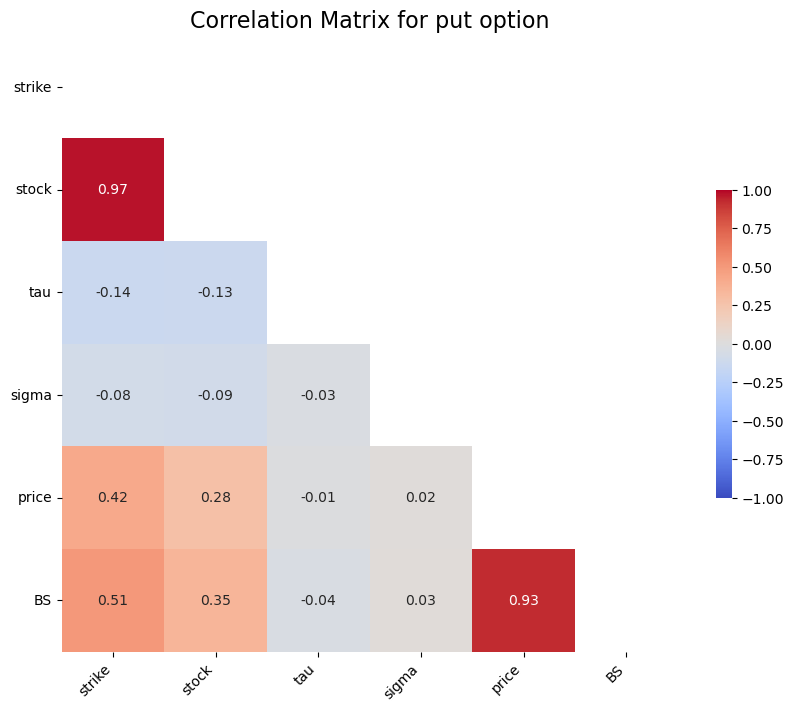

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Compute the correlation matrix
correlation_matrix = put_data.corr()

# Ensure the correlation values are between -1 and 1
assert correlation_matrix.min().min() >= -1 and correlation_matrix.max().max() <= 1, "Correlation values should be between -1 and 1."

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .5}, mask=mask, vmin=-1, vmax=1)

# Add titles and labels
plt.title('Correlation Matrix for put option', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Display the heatmap
plt.show()


In [13]:
put_data

,strike,stock,tau,sigma,price,BS
65,210.0,406.22,0.031746,0.223118,0.01,1.445809e-62
66,220.0,404.52,0.019841,0.223118,0.02,1.628261e-84
67,235.0,405.57,0.095238,0.223118,0.02,1.823804e-15
68,250.0,404.06,0.091270,0.223118,0.02,9.999526e-13
69,255.0,414.92,0.047619,0.223118,0.02,7.833392e-24
...,...,...,...,...,...,...
73144,4.0,3.48,0.642857,2.166917,2.15,2.476634e+00
73145,4.5,1.06,0.083333,2.166917,3.40,3.428810e+00
73146,5.5,2.36,0.436508,2.166917,3.43,3.819911e+00
73152,1.0,11.65,0.464286,1.064334,0.25,1.906336e-04


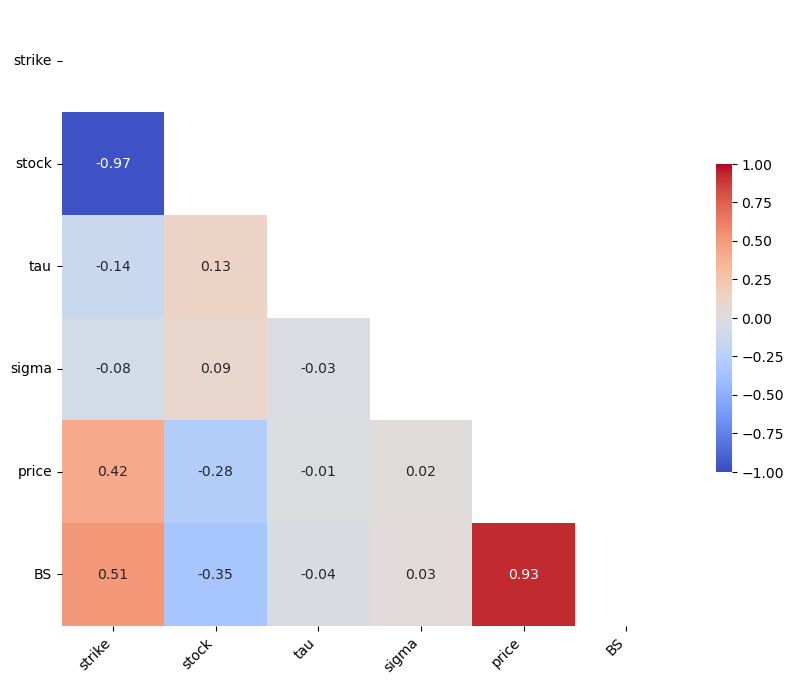

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Compute the correlation matrix
correlation_matrix = put_data.corr()

# Ensure the correlation values are between -1 and 1
assert correlation_matrix.min().min() >= -1 and correlation_matrix.max().max() <= 1, "Correlation values should be between -1 and 1."

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .5}, mask=mask, vmin=-1, vmax=1)

# Add titles and labels
plt.title('Correlation Matrix for put  option', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Display the heatmap
plt.show()


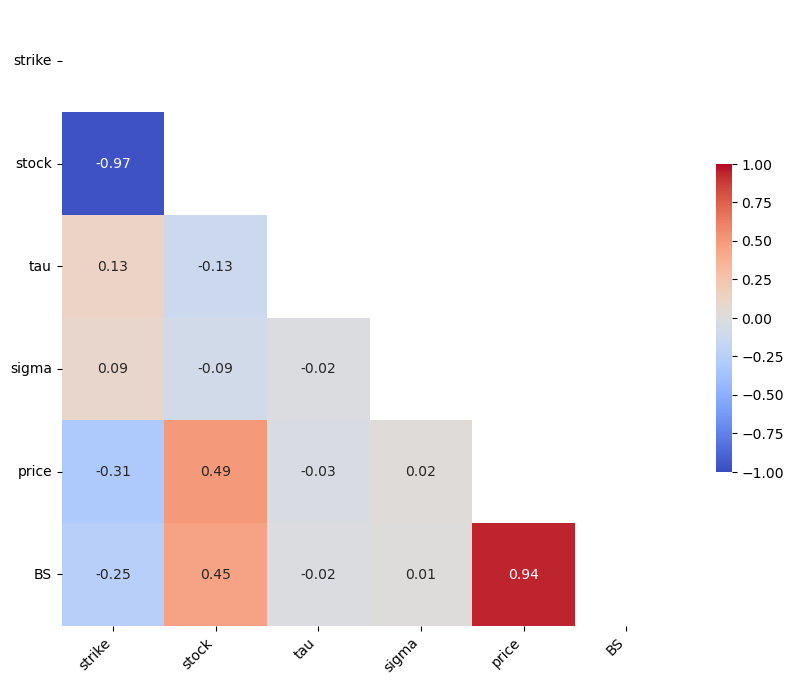

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Compute the correlation matrix
correlation_matrix = call_data.corr()

# Ensure the correlation values are between -1 and 1
assert correlation_matrix.min().min() >= -1 and correlation_matrix.max().max() <= 1, "Correlation values should be between -1 and 1."

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .5}, mask=mask, vmin=-1, vmax=1)

# Add titles and labels
#plt.title('Correlation Matrix for call option', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Display the heatmap
plt.show()


### Checking option conformity

In [135]:
call_data['Cond 1'] = call_data.BS >= 0
call_data['Cond 2'] = call_data.stock > call_data.BS
call_data['Cond 3'] = call_data.BS > call_data.stock - call_data.strike * np.exp((-0.0425) * call_data.tau)

In [136]:
call_data[call_data['C>S-Ke^((r)t)'] == False] 

,strike,stock,tau,sigma,price,BS,C>0,S>C,C>S-Ke^((r)t),Cond 1,Cond 2,Cond 3
0,210.0,407.48,0.055556,0.223118,199.70,197.975248,True,True,False,True,True,False
1,220.0,417.32,0.003968,0.223118,200.32,197.357100,True,True,False,True,True,False
2,230.0,417.32,0.003968,0.223118,189.90,187.358786,True,True,False,True,True,False
4,250.0,417.32,0.003968,0.223118,170.23,167.362159,True,True,False,True,True,False
5,255.0,404.52,0.023810,0.223118,170.82,149.777905,True,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
71750,0.5,5.88,0.119048,0.892640,0.20,5.382523,True,True,False,True,True,False
72327,0.5,5.15,0.067460,1.121631,0.15,4.651431,True,True,False,True,True,False
72568,0.5,1.06,0.007937,0.779265,0.65,0.560169,True,True,False,True,True,False
72905,0.5,7.00,0.071429,0.976480,0.05,6.501516,True,True,False,True,True,False


In [142]:
put_data['Cond 1'] = put_data.BS >= 0
put_data['Cond 2'] = put_data.stock >= put_data.BS
put_data['Cond 3'] = put_data.BS >  put_data.strike * np.exp((-0.0425) * put_data.tau) - put_data.stock 

In [144]:
put_data[put_data['Cond 3'] == False] 

,strike,stock,tau,sigma,price,BS,Cond 1,Cond 2,Cond 3
125,495.0,417.32,0.007937,0.223118,72.30,77.513064,True,True,False
126,510.0,416.42,0.011905,0.223118,86.30,93.322030,True,True,False
206,190.0,173.72,0.003968,0.188858,18.65,16.247959,True,True,False
210,200.0,173.72,0.007937,0.188858,29.35,26.212551,True,True,False
211,205.0,173.72,0.003968,0.188858,33.13,31.245430,True,True,False
...,...,...,...,...,...,...,...,...,...
72874,2.5,0.64,0.071429,0.642882,1.75,1.852422,True,False,False
72885,5.0,0.37,0.095238,0.852292,4.60,4.609803,True,False,False
72887,5.0,0.32,0.075397,0.641536,4.60,4.664004,True,False,False
72900,7.5,1.69,0.075397,0.226221,5.60,5.786006,True,False,False
